# IHDP Data

Import of all needed libraries, numpy, pandas, matplot, sckitlearn, some will be used further on. 

In [34]:
import numpy as np
import matplotlib.pyplot as plt

Data import and structure checking, we are able to see that the characteristics "x", we have treatment "t", the outcome "yf" and counter "ycf" and the indivudial treatment effect "ite".

In [35]:
df = np.load("D:\Documents\CARRERA\Essex\DataScience-CE888\Assignments\CE888 Assignment 1\ihdp.npz")

df.files

['x', 't', 'yf', 'ycf', 'ite']

Check for missing values and the shape of the dataframe. There are the 29 columns, the 5 mentioned above, in which "x" is an array of 25x747, meaning there are 25 background variables. Each column contains 747 rows of data, including the labels. Also we noticed there are no missing values in any column.

In [36]:
for data in df.files:
  print(f'{data}: {df[data].shape}')

x: (747, 25)
t: (747, 1)
yf: (747, 1)
ycf: (747, 1)
ite: (747, 1)


As we can see our background features "x" are divided in 25 columns, which will be merged for a better analysis when visualizing the data. There is also noticeable that this dataset contains the outcome factuals and counterfactuals, which tells us it has simulated outcomes (since it is not common to have both, as we can not go back in time). And instead of the effect, we are given the _Individual Treatment Effect_.

In [37]:
X = df['x'].reshape(-1, 1)
T = df['t'].reshape(-1, 1)
Yf = df['yf'].reshape(-1, 1)
Ycf = df['ycf'].reshape(-1, 1)
ite = df['ite']

To have a better understandment of the behaviour of the data, we will plot it's histograms.

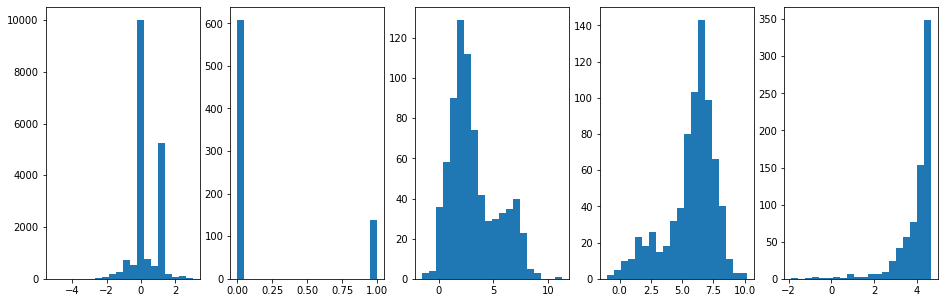

In [38]:
bins=20
fig, axs = plt.subplots(1, 5, figsize=(16, 5))
axs[0].hist(X, bins=bins)
axs[1].hist(T, bins=bins)
axs[2].hist(Yf, bins=bins)
axs[3].hist(Ycf, bins=bins)
axs[4].hist(ite, bins=bins)
plt.show()

In [39]:
print("Amount of 0 in T: ", np.count_nonzero(df['t'] == 0))
print("Amount of 1 in T: ", np.count_nonzero(df['t'] == 1))

Amount of 0 in T:  608
Amount of 1 in T:  139


As seen above one of the first things that come to mind are the difference in T.  Having a count of values we are able to see that the data for treatment is not balanced, having **81.39 %** _not treated_ and the remaining **18.61 %** _is_.

While the *ITE* is clearly skewed to the left, as *Ycf* is and therefore expecting that *Yf* skewes to the right.

In [40]:
np.mean(ite)

Due to the skewness of *ITE* we find that as expected the *ATE* is **4.016**.